# ML 분반 Week6 (SVM & DT) 과제
## 제출자:김재훈_20기

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC, SVR

- SVC (Classification)
- SVR (Regression)

# Hard Margin Classifier

### Q1. Hard Margin Classifier란? : 데이터를 분류할 때 마진을 타이트하게 잡아서 초평면을 넘어가는 데이터값(outlier)이 없게 마진을 설정하는 것이다. 이 경우 오버피팅이 잘 일어날 수 있다. 

In [6]:
# 데이터셋 생성
X = np.array([[1, 2], [2, 3], [3, 3], [6, 6], [7, 8], [8, 8]])
y = np.array([0, 0, 0, 1, 1, 1])

### Q2. 위 데이터셋을 2차원의 좌표평면에 시각화해주세요.

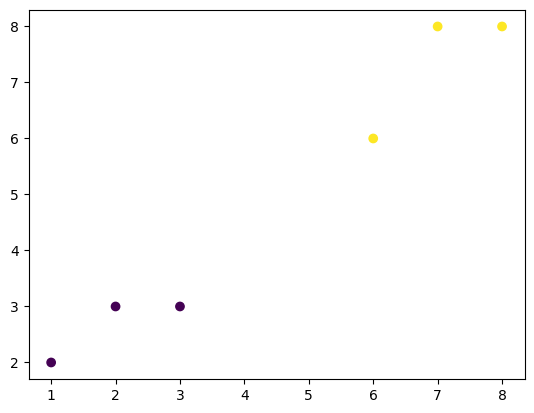

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [8]:
# Hard Margin SVM 모델 학습
model = SVC(kernel='linear', C=1e10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

### Q3. 하단 w와 b는 모델 학습으로 찾아낸 Wx+b의 계수와 상수항입니다. w와 b를 정의해주세요.

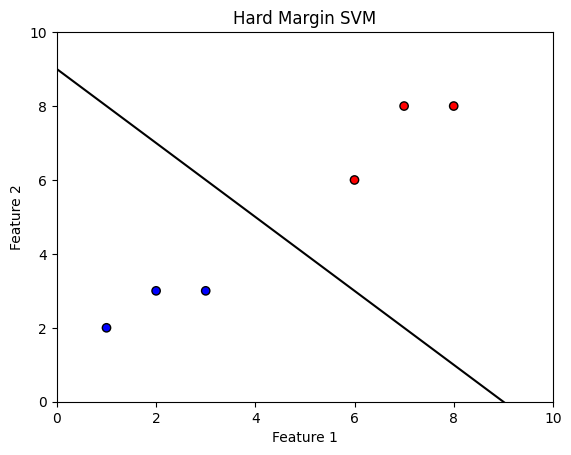

In [9]:
# 결정 경계 시각화
w = model.coef_[0]
b = model.intercept_[0]
x_plot = np.linspace(0, 10, 100)
y_plot = -(w[0] * x_plot + b) / w[1]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.plot(x_plot, y_plot, 'k-')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hard Margin SVM')
plt.show()

# Soft Margin Classifier

### Q4. Soft Margin Classifier란?

Hard Margin Classifier와 달리 약간의 이상치를 허용하는 분류방법이다. 

### Q5. Soft Margin의 정의를 떠올리며, 노이즈가 추가된 데이터셋을 생성해주세요. (2개 이상 추가 생성 필요)

In [10]:
# 데이터셋 생성 (약간의 노이즈 추가)
X = np.array([[1, 2], [2, 3], [3, 3], [6, 6], [7, 8], [8, 8], [5, 5], [1, 3]])
y = np.array([0, 0, 0, 1, 1, 1, 0, 1])

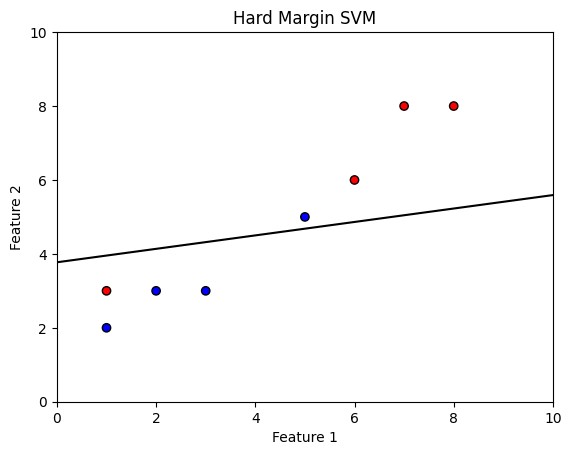

In [11]:
# Soft Margin SVM 모델 학습
model = SVC(kernel='linear', C=1.0)
model.fit(X, y)

w = model.coef_[0]
b = model.intercept_[0]
x_plot = np.linspace(0, 10, 100)
y_plot = -(w[0] * x_plot + b) / w[1]

#시각화로 확인하기
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.plot(x_plot, y_plot, 'k-')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hard Margin SVM')
plt.show()


### Q6. 마진을 산출해 시각화하고, Support Vector을 찾아주세요.

하단 그림은 예시로, 꼭 똑같이 출력되지 않아도 됩니다.

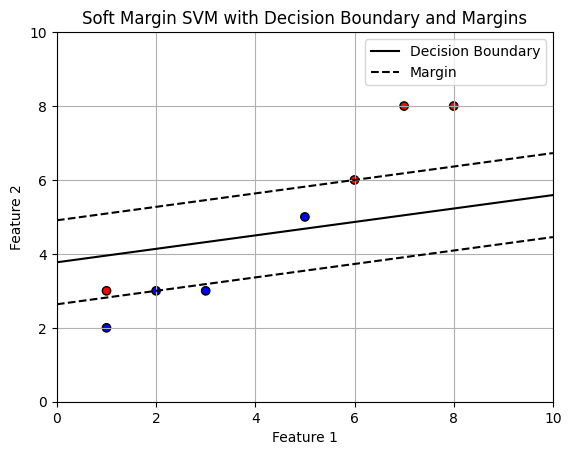

In [12]:
# 결정 경계 시각화
w =model.coef_[0]
b =model.intercept_[0]
x_plot = np.linspace(0, 10, 100)
y_plot = -(w[0] * x_plot + b) / w[1]

# 마진 경계 계산
margin = 2 / np.sqrt(np.sum(w ** 2))
y_margin_positive = -(w[0] * x_plot + b -1) / w[1]
y_margin_negative = -(w[0] * x_plot + b +1) / w[1]

# 마진 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.plot(x_plot, y_plot, 'k-', label='Decision Boundary')
plt.plot(x_plot, y_margin_positive, 'k--', label='Margin')
plt.plot(x_plot, y_margin_negative, 'k--')

plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Soft Margin SVM with Decision Boundary and Margins')
plt.legend()
plt.grid(True)
plt.show()

# 프로젝트 (SVC)

In [13]:
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix

### Linear SVC

In [37]:
iris = load_iris()

X = iris.data[:, :2]
y = iris.target

C = 1
clf = SVC(kernel = "linear", C=C)
clf.fit(X,y)

SVC(C=1, kernel='linear')

In [38]:
y_pred = clf.predict(X) # 학습 데이터의 재예측 (실습용)
confusion_matrix(y, y_pred) # 따라서, 분류 결과가 상당히 정확할 수밖에 없음을 감안해야 함

array([[50,  0,  0],
       [ 0, 38, 12],
       [ 0, 15, 35]], dtype=int64)

### Q7. 위 예시처럼, 옵션을 linear로 설정해도 되지만, sklearn의 LinearSVC 함수를 사용해도 구현할 수 있습니다. LinearSVC로 재구현해주세요.

In [39]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

#test, train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#model 적합
model1 = LinearSVC(C=1)
model1.fit(X_train,y_train)


c:\Users\13wog\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\13wog\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1)

### Kernal SVC

### Q8. Kernel SCV - non-linear한 형태의 SVM을 하나 이상 구현해주세요. 동일하게, 학습데이터를 predict하여 confusion matrix를 구해주세요.

In [40]:
#poly model
model2 = SVC(kernel='poly', C=1.0, gamma='scale')
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
confusion_matrix(y_test, y_pred2)

array([[10,  0,  0],
       [ 0,  7,  2],
       [ 0,  3,  8]], dtype=int64)

In [41]:
#RBF model
model3 = SVC(kernel='rbf', C=1.0, gamma='scale')
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
confusion_matrix(y_test, y_pred3)


array([[10,  0,  0],
       [ 0,  7,  2],
       [ 0,  1, 10]], dtype=int64)

### 시각화

### Q9. 아래 예시 plot처럼, linear model과 non-linear 모델의 시각화 결과를 출력해주세요.

c:\Users\13wog\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\13wog\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


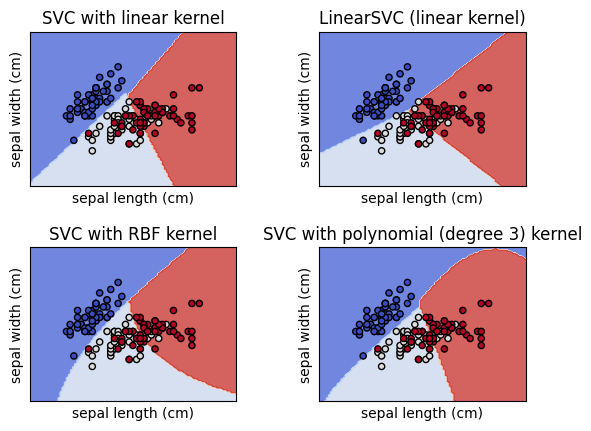

In [42]:
from sklearn.inspection import DecisionBoundaryDisplay

#모델 정의
models = (clf.fit(X,y), model1.fit(X_train, y_train), model2.fit(X_train, y_train), model3.fit(X_train, y_train))

#title
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

### 수고하셨습니다.